In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Train-1.csv')
df0 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [3]:
# Memisahkan fitur sesuai tipe data
cat = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [ ]:
# Menampilkan statistik deskripsi untuk tipe data numerikal
df[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Hasil Observasi:
*   Kolom Customer_care_calls, customer_rating, dan Cost_of_the_Product memiliki distubusi yang normal/simetris (nilai mean dan median yang tidak berbeda jauh)
* Kolom The Discount_offered and Prior_purchases memiliki distibusi skewed positive (long-right tail)
* Kolum Reached.on.Time_Y.N merupakan boolean (miliki nilai 0/1)




In [ ]:
# Menampilkan statistik deskripsi untuk tipe data kategorikal
df[cat].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [ ]:
top_warehouse = (df['Warehouse_block'] == 'F').sum()/len(df)*100
top_shipment = (df['Mode_of_Shipment'] == 'Ship').sum()/len(df)*100
top_product_importance = (df['Product_importance'] == 'low').sum()/len(df)*100
top_gender = (df['Gender'] == 'F').sum()/len(df)*100

print(f'Persentase top value dari kolom Warehouse_block adalah: {top_warehouse:.2f}%')
print(f'Persentase top value dari kolom Mode_of_Shipment adalah: {top_shipment:.2f}%')
print(f'Persentase top value dari kolom Product_importance adalah: {top_product_importance:.2f}%')
print(f'Persentase top value dari kolom Gender adalah: {top_gender:.2f}%')

Persentase top value dari kolom Warehouse_block adalah: 33.33%
Persentase top value dari kolom Mode_of_Shipment adalah: 67.84%
Persentase top value dari kolom Product_importance adalah: 48.16%
Persentase top value dari kolom Gender adalah: 50.41%



* Kolom dengan tipe data kategorikal memiliki 2-5 *unique value*
* Kolom Warehouse_block didominasi oleh F dengan persentase 33.33%
* Kolom Mode_of_Shipment didominasi oleh Ship dengan persentase 67.84%
* Kolom Product_importance didominasi oleh kategori low dengan persentase 48.16%
* Kolom Gender didominasi oleh F dengan persentase 50.41%





In [ ]:
# Menampilkan data yang duplikat
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [ ]:
data_clean = df.copy()

Setiap kolom pada data bersifat unik dan tidak memiliki duplikasi

##**1. Data Cleansing**

**Handle missing values**

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Handle missing values tidak perlu dilakukan karena data tidak memiliki missing value

**Handle duplicated data**

In [ ]:
df.duplicated().sum()

0

Handle duplicated data tidak perlu dilakukan karena data tidak memiliki duplikat

**Handle outliers**

In [ ]:
df1 = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 10999


In [ ]:
filtered_entries1 = np.array([True] * len(df1))
filtered_entries1

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
for col in nums:
    zscore = abs(stats.zscore(df1[col])) #absolute z-score
    filtered_entries1 = (zscore < 3) & filtered_entries1 # keep yang kurang dari 3 absolute z-scorenya


df1 = df1[filtered_entries1] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')


Jumlah baris setelah memfilter outlier: 10642


Dengan menggunakan z score Outlier dari **10999** diturunkan menjadi **10642**. Berarti ada **3%** yang dihapus dari outlier.

**Feature transformation**

In [ ]:
df1.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,5570.347773,4.065683,2.989194,210.578557,3.463447,12.528660,3646.514189,0.590303
std,3159.806013,1.145348,1.412344,48.077818,1.288855,14.992539,1639.849048,0.491801
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2881.250000,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000,0.000000
50%,5604.500000,4.000000,3.000000,215.000000,3.000000,7.000000,4172.000000,1.000000
75%,8300.750000,5.000000,4.000000,251.000000,4.000000,10.000000,5063.750000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,8.000000,61.000000,7846.000000,1.000000


In [ ]:
df1.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,5570.347773,4.065683,2.989194,210.578557,3.463447,12.528660,3646.514189,0.590303
std,3159.806013,1.145348,1.412344,48.077818,1.288855,14.992539,1639.849048,0.491801
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2881.250000,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000,0.000000
50%,5604.500000,4.000000,3.000000,215.000000,3.000000,7.000000,4172.000000,1.000000
75%,8300.750000,5.000000,4.000000,251.000000,4.000000,10.000000,5063.750000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,8.000000,61.000000,7846.000000,1.000000


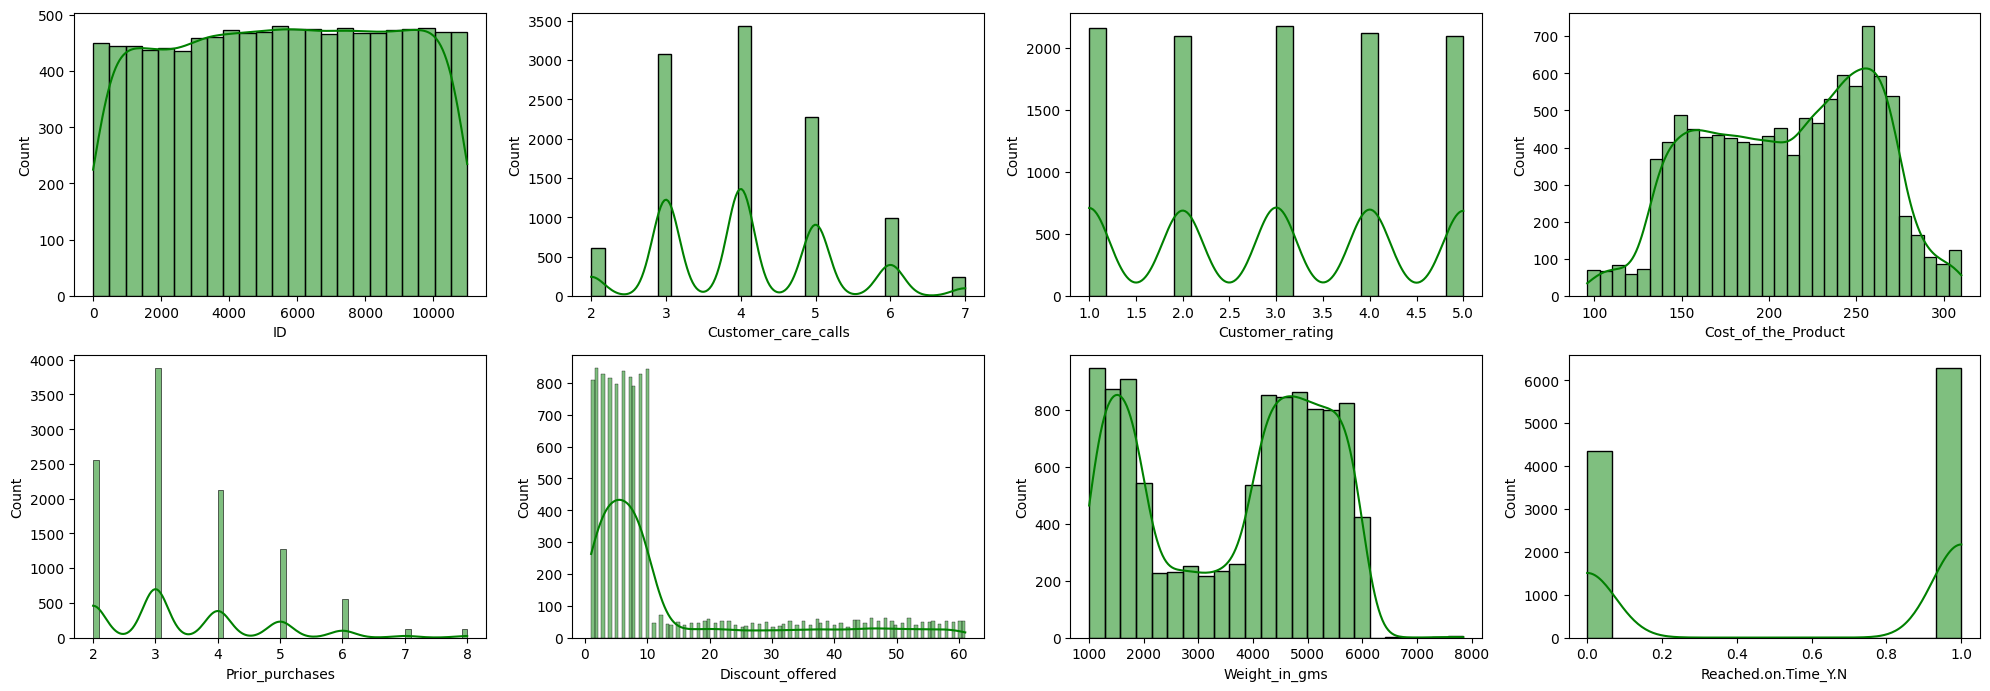

In [ ]:
import math
features = nums  # Make sure you have defined `nums` elsewhere in your code
plt.figure(figsize=(20, 10))
num_cols = math.ceil(len(nums) / 2)

for i in range(0, len(nums)):
    plt.subplot(3, num_cols, i+1)
    sns.histplot(x=df1[features[i]], kde=True, color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()

<Axes: xlabel='Prior_purchases', ylabel='Density'>

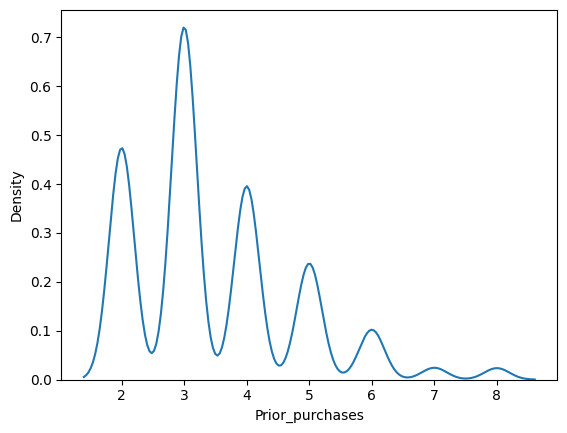

In [ ]:
#Log Transformation
sns.kdeplot(df1['Prior_purchases'])

<Axes: xlabel='Prior_purchases', ylabel='Density'>

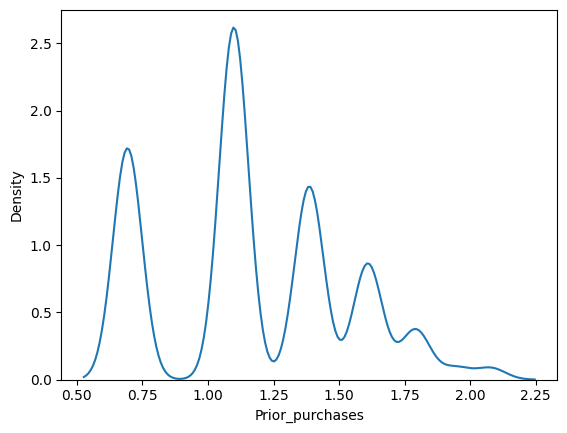

In [ ]:
sns.kdeplot(np.log(df1['Prior_purchases']))

<Axes: xlabel='Discount_offered', ylabel='Density'>

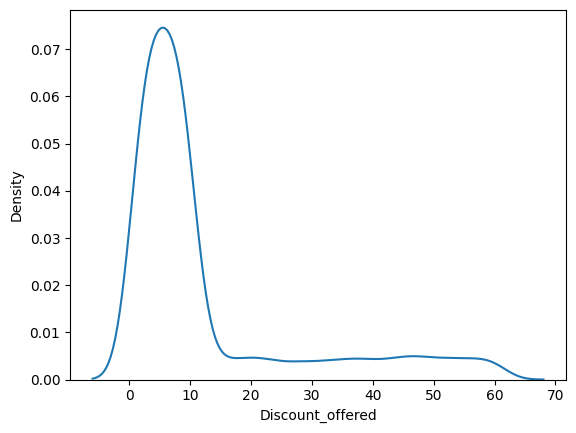

In [ ]:
sns.kdeplot(df1['Discount_offered'])

<Axes: xlabel='Discount_offered', ylabel='Density'>

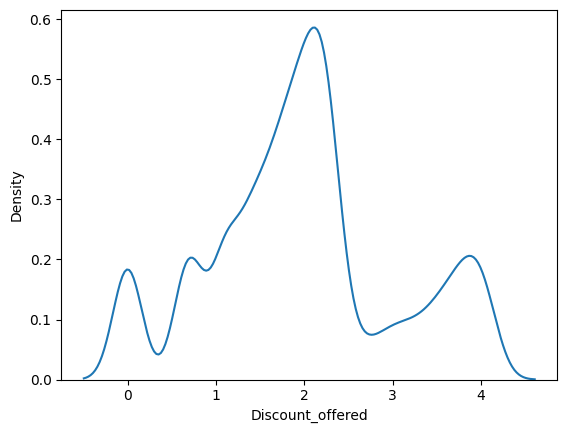

In [ ]:
sns.kdeplot(np.log(df1['Discount_offered']))

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

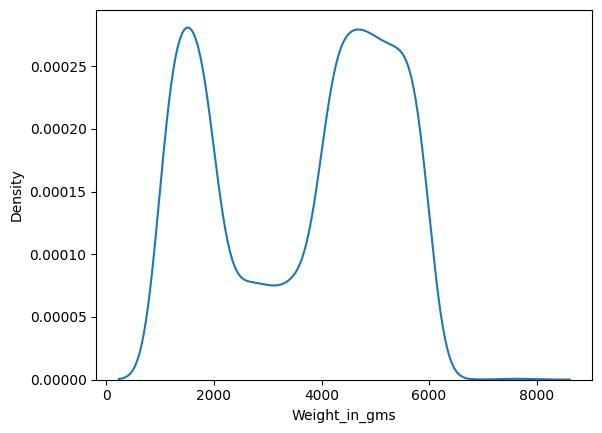

In [ ]:
sns.kdeplot(df1['Weight_in_gms'])

<Axes: xlabel='Weight_in_gms', ylabel='Density'>

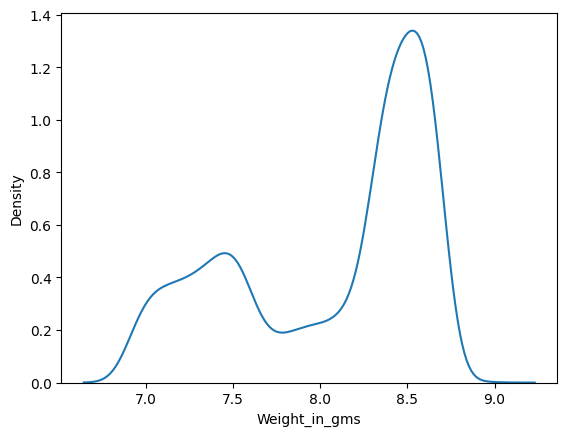

In [ ]:
sns.kdeplot(np.log(df1['Weight_in_gms']))

<Axes: xlabel='Cost_of_the_Product', ylabel='Density'>

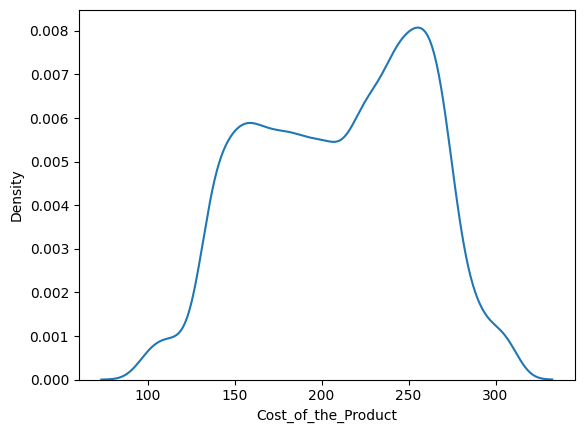

In [ ]:
sns.kdeplot(df1['Cost_of_the_Product'])

<Axes: xlabel='Cost_of_the_Product', ylabel='Density'>

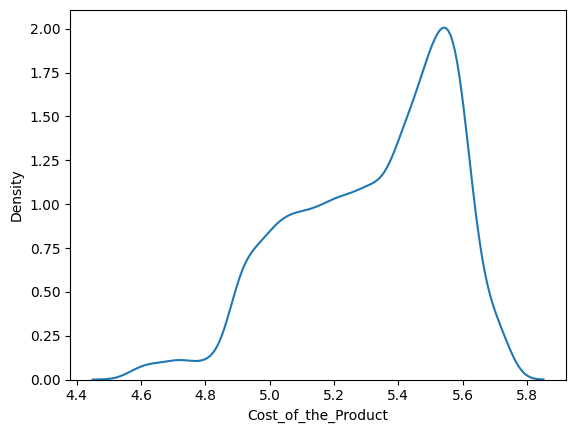

In [ ]:
sns.kdeplot(np.log(df1['Cost_of_the_Product']))

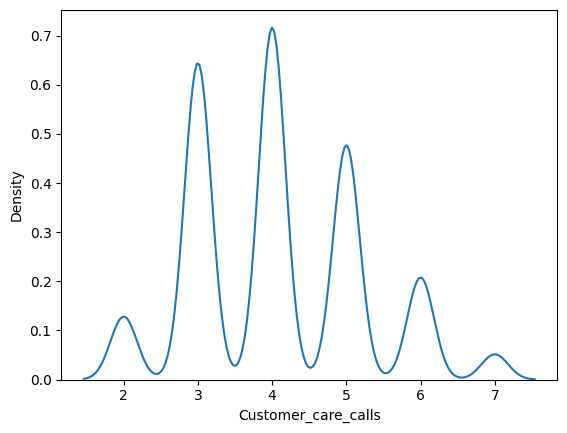

In [ ]:
sns.kdeplot(df1['Customer_care_calls']);

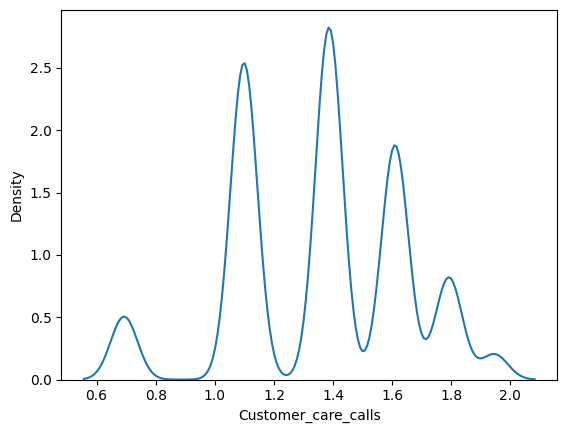

In [ ]:
sns.kdeplot(np.log(df1['Customer_care_calls']));

In [ ]:
df1['log_prior_purchases'] = np.log(df1['Prior_purchases'])
df1['log_discount_offered'] = np.log(df1['Discount_offered'])
#df1['log_weight_in_gms'] = np.log(df1['Weight_in_gms'])

In [ ]:
#Drop Kolom lama
df1 = df1.drop(columns=['ID', 'Prior_purchases', 'Discount_offered'])
df1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N,log_prior_purchases,log_discount_offered
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,4.065683,2.989194,210.578557,3646.514189,0.590303,1.178075,1.961307
std,1.145348,1.412344,48.077818,1639.849048,0.491801,0.354866,1.055971
min,2.000000,1.000000,96.000000,1001.000000,0.000000,0.693147,0.000000
25%,3.000000,2.000000,170.000000,1837.000000,0.000000,1.098612,1.386294
50%,4.000000,3.000000,215.000000,4172.000000,1.000000,1.098612,1.945910
75%,5.000000,4.000000,251.000000,5063.750000,1.000000,1.386294,2.302585
max,7.000000,5.000000,310.000000,7846.000000,1.000000,2.079442,4.110874


**Feature encoding**

In [ ]:
cats_updated = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df1[col].value_counts())
  print('---'*10, '\n')

value counts of column Mode_of_Shipment
Ship      7211
Flight    1728
Road      1703
Name: Mode_of_Shipment, dtype: int64
------------------------------ 

value counts of column Product_importance
low       5173
medium    4587
high       882
Name: Product_importance, dtype: int64
------------------------------ 

value counts of column Gender
F    5356
M    5286
Name: Gender, dtype: int64
------------------------------ 

value counts of column Warehouse_block
F    3539
B    1778
D    1777
A    1777
C    1771
Name: Warehouse_block, dtype: int64
------------------------------ 



Encoding:
- Label Encoding: Product_importance, Gender
- One Hot Encoding : Mode_of_Shipment, Warehouse_block

In [ ]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df1['Product_importance'] = df1['Product_importance'].map(mapping_Product_importance)
df1['Gender'] = df1['Gender'].map(mapping_Gender)

In [ ]:
# One Hot Encoder
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df1[cat], prefix=cat)
    df1 = df1.join(onehots)

In [ ]:
# drop kolom yang di encoding menggunakan OHE : 'Mode_of_Shipment' & 'Warehouse_block'
df1 = df1.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [ ]:
df1.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_prior_purchases,log_discount_offered,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,4,2,177,0,0,1233,1,1.098612,3.784190,1,0,0,0,0,0,1,0
1,4,5,216,0,1,3088,1,0.693147,4.077537,1,0,0,0,0,0,0,1
2,2,2,183,0,1,3374,1,1.386294,3.871201,1,0,0,1,0,0,0,0
3,3,3,176,1,1,1177,1,1.386294,2.302585,1,0,0,0,1,0,0,0
4,2,2,184,1,0,2484,1,1.098612,3.828641,1,0,0,0,0,1,0,0


### Split Data Train and Data Test

In [ ]:
X= df1[['Warehouse_block_A','Warehouse_block_B', 'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship','Customer_care_calls','Customer_rating','Cost_of_the_Product','log_prior_purchases','Product_importance','Gender','log_discount_offered','Weight_in_gms']]
y= df1['Reached.on.Time_Y.N']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, train_size=0.8)

### Scaling Data

In [ ]:
#Normalisasi
X_train['Customer_rating'] =  MinMaxScaler().fit_transform(X_train['Customer_rating'].values.reshape(len(X_train), 1))
X_train['Customer_care_calls'] = MinMaxScaler().fit_transform(X_train['Customer_care_calls'].values.reshape(len(X_train), 1))
X_train['Cost_of_the_Product'] = MinMaxScaler().fit_transform(X_train['Cost_of_the_Product'].values.reshape(len(X_train), 1))
X_train['log_prior_purchases'] = MinMaxScaler().fit_transform(X_train['log_prior_purchases'].values.reshape(len(X_train), 1))
X_train['log_discount_offered'] = MinMaxScaler().fit_transform(X_train['log_discount_offered'].values.reshape(len(X_train), 1))
X_train['Weight_in_gms'] = MinMaxScaler().fit_transform(X_train['Weight_in_gms'].values.reshape(len(X_train), 1))

In [ ]:
X_train.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Customer_care_calls,Customer_rating,Cost_of_the_Product,log_prior_purchases,Product_importance,Gender,log_discount_offered,Weight_in_gms
4789,0,0,0,0,1,0,1,0,0.6,0.50,0.635514,0.903677,1,1,0.435859,0.625858
8880,0,0,0,1,0,0,1,0,1.0,1.00,0.990654,0.500000,1,1,0.000000,0.069540
8826,0,0,0,1,0,0,0,1,0.6,0.50,0.799065,0.792481,0,0,0.505839,0.061359
5031,0,1,0,0,0,0,0,1,0.8,0.75,0.925234,0.500000,1,1,0.435859,0.016216
5495,0,0,0,0,1,1,0,0,0.0,0.25,0.602804,0.903677,2,1,0.534491,0.576479


In [ ]:
y_train

4789    1
8880    1
8826    1
5031    0
5495    1
       ..
6601    0
9181    0
774     1
6110    1
8585    1
Name: Reached.on.Time_Y.N, Length: 8513, dtype: int64

**Handle class imbalance**

In [ ]:
y_train.value_counts()

1    5000
0    3513
Name: Reached.on.Time_Y.N, dtype: int64

Data kolom target terlihat cukup seimbang , sehingga **tidak perlu dilakukan** Handle class imbalance

##**2. Feature Engineering**

In [ ]:
df0.corr()

<ipython-input-40-a6649e8b8fae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0.corr()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<ipython-input-41-ca8e68e21904>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df0.corr(), cmap='Blues', annot=True, fmt='.2f');


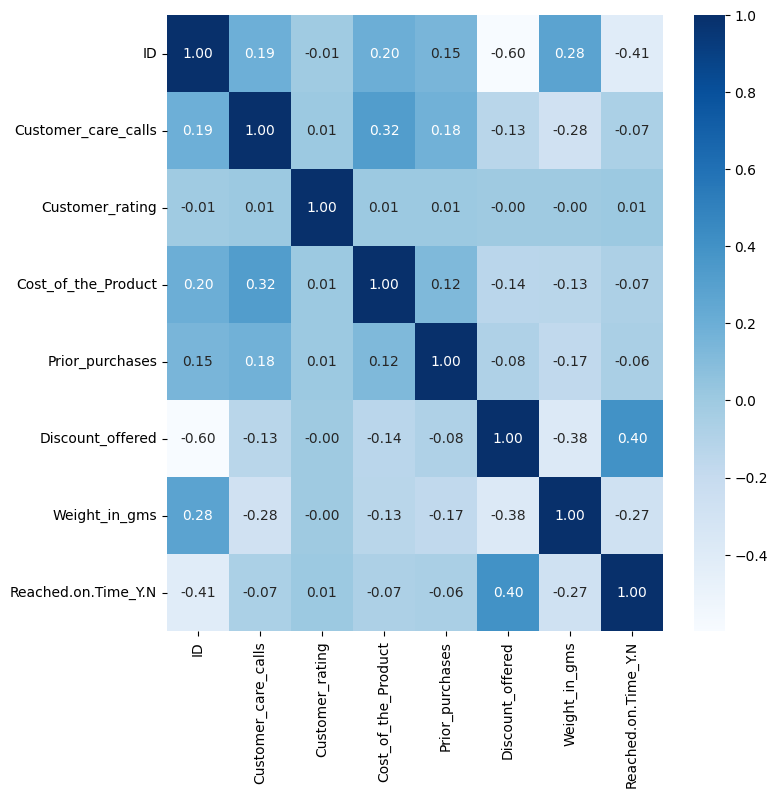

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df0.corr(), cmap='Blues', annot=True, fmt='.2f');

Berdasarkan heatmap yg akan dipilih kolom dengan the threshold (0,05) dengan kolom target Reached.on.Time_YN: Customer_care_calls, Cost_of_the_Products, Prior_Purchases, Discount_offered, dan Weight_in_grms

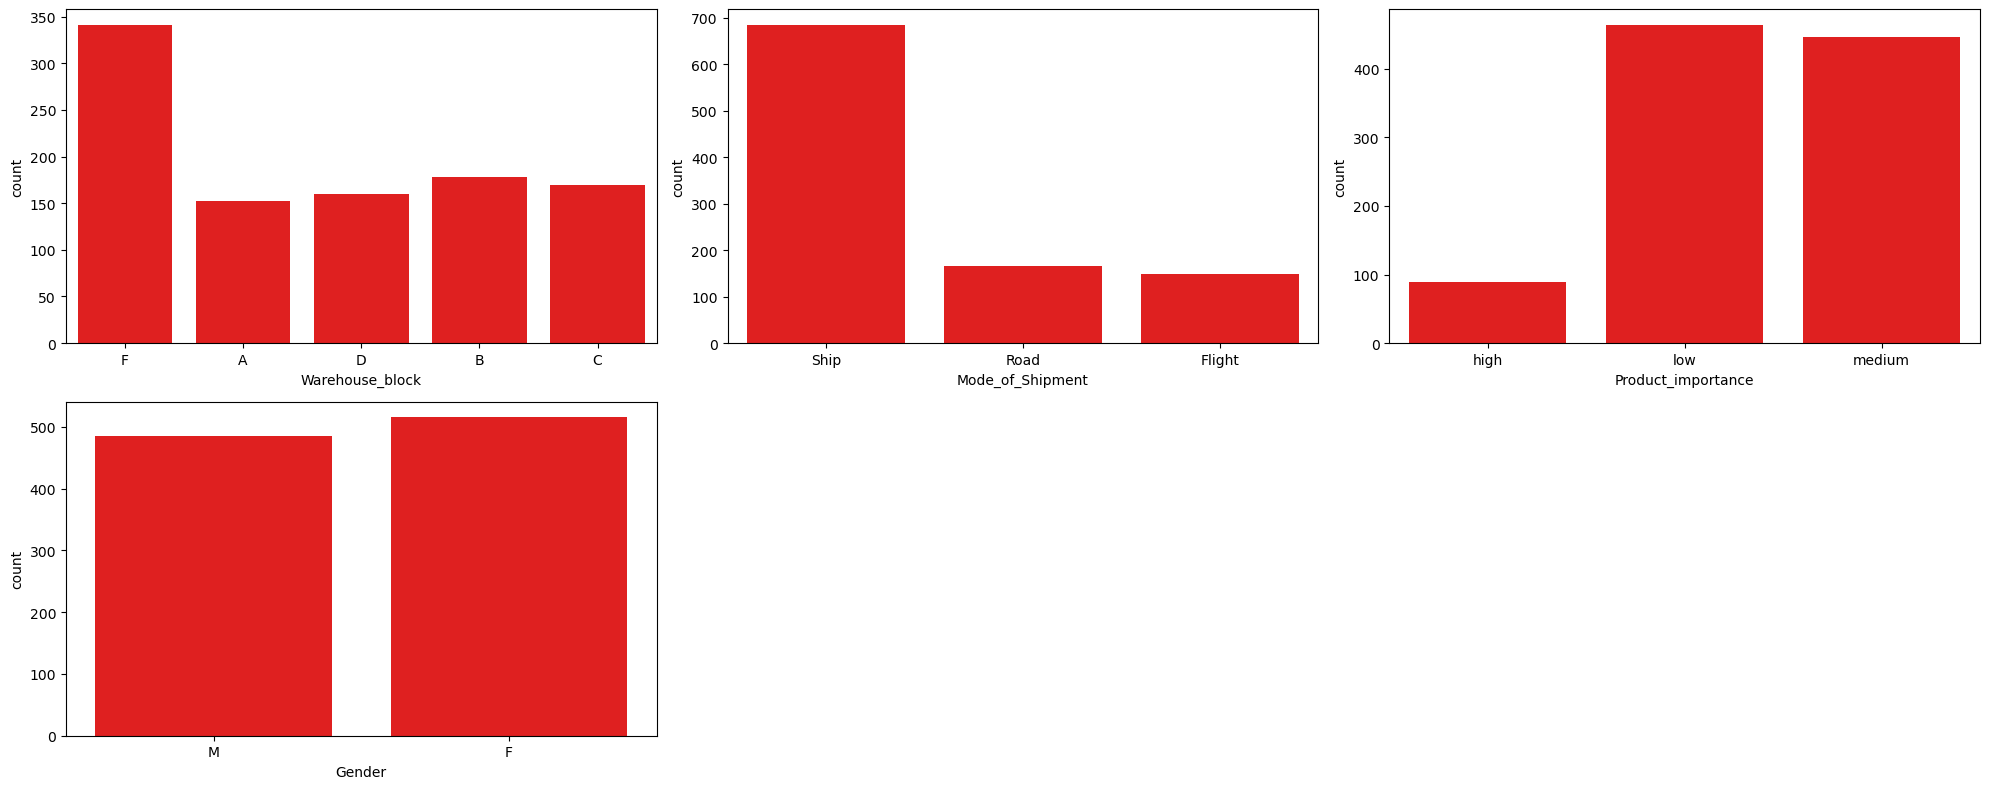

In [4]:
df_sample = df0.sample(1000, random_state=42)
plt.figure(figsize=(20,8))
for i in range(0, len(cat)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cat[i]], color='red', orient='v')
    plt.tight_layout()

**Feature Extraction**

In [ ]:
data_clean['performance_warehouse'] = np.where(
    (
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='A') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='D') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] =='F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'high') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
"Best",
    np.where((
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'medium') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
    "Better",
    np.where(
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'A') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'B') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'C') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'D') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Product_importance'] == 'low') & (data_clean['Warehouse_block'] == 'F') & (data_clean['Reached.on.Time_Y.N'] == 1)),
        "Good","Low"
    )
    )
)

In [ ]:
print(data_clean['performance_warehouse'].value_counts())

Good      5297
Better    4754
Best       948
Name: performance_warehouse, dtype: int64


In [ ]:
warehouse_probs = data_clean.groupby(['performance_warehouse', 'Reached.on.Time_Y.N']).agg({
    'Product_importance': ['count']
}).reset_index()

warehouse_probs.columns = ['performance_warehouse', 'Reached.on.Time_Y.N','on time']

warehouse_probs = pd.pivot_table(warehouse_probs,
                             index = 'performance_warehouse',
                             columns = 'Reached.on.Time_Y.N',
                             values = 'on time').reset_index()

warehouse_probs.columns = ['performance_warehouse','on.Time','not_on.Time']
warehouse_probs['warehouse_probs'] = (warehouse_probs['on.Time']/(warehouse_probs['not_on.Time']+warehouse_probs['on.Time']))*100
warehouse_probs = warehouse_probs.sort_values('warehouse_probs', ascending=False).reset_index(drop=True)
warehouse_probs.head()

,performance_warehouse,on.Time,not_on.Time,warehouse_probs
0,Better,1947,2807,40.954985
1,Good,2157,3140,40.721163
2,Best,332,616,35.021097


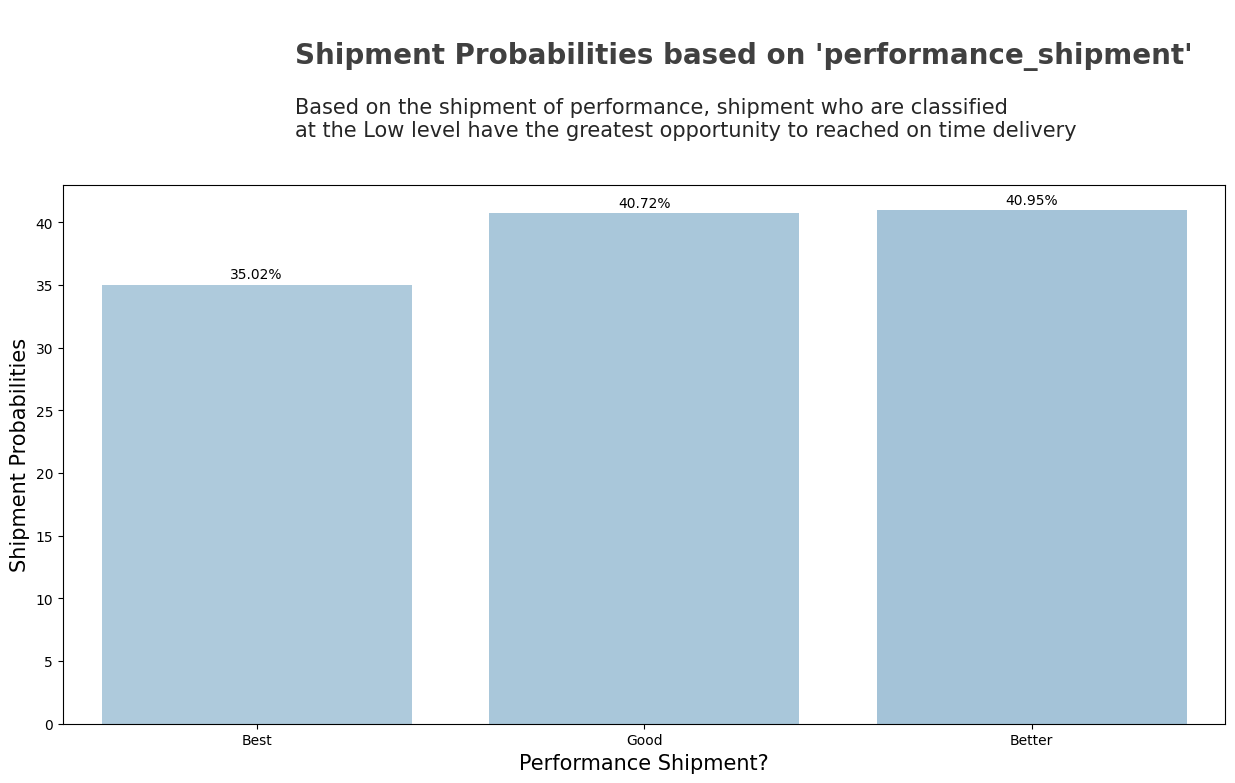

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

g = sns.barplot(x='performance_warehouse', y='warehouse_probs', data=warehouse_probs,
                order=warehouse_probs.sort_values('warehouse_probs',ascending = True).performance_warehouse,
                palette=sns.color_palette("Blues_d", n_colors=40, desat=1)
               )

for p in g.patches:
    height = p.get_height()
    plt.text(x = p.get_x() + (p.get_width()/2),
           y = height + 0.5,
           s = str('{:.2f}'.format(height)) + '%',
           ha = 'center'
          )

title = '''
Shipment Probabilities based on 'performance_shipment'
'''

text = '''
Based on the shipment of performance, shipment who are classified
at the Low level have the greatest opportunity to reached on time delivery
'''

#plt.yticks([]) # Hide the y-axis with empty list
plt.xlabel('Performance Shipment?', fontsize = 15) # Add the x-label
plt.ylabel('Shipment Probabilities', fontsize = 15) # Add the y-label

plt.text(x = 0.1, y = 50, s=title,
        fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.1, y = 45, s=text,
        fontsize = 15, alpha = .85);

In [ ]:
data_clean['performance_shipment'] = np.where(
    (
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] =='Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 5) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
"Best",
    np.where((
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 4) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1))
    ),
    "Better",
    np.where(
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 0)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Road') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Ship') & (data_clean['Reached.on.Time_Y.N'] == 1)) |
        ((data_clean['Customer_rating'] == 3) & (data_clean['Mode_of_Shipment'] == 'Flight') & (data_clean['Reached.on.Time_Y.N'] == 1)),
        "Good","Low"
    )
    )
)

In [ ]:
perform_probs = data_clean.groupby(['performance_shipment', 'Reached.on.Time_Y.N']).agg({
    'Product_importance': ['count']
}).reset_index()

perform_probs.columns = ['performance_shipment', 'Reached.on.Time_Y.N','on time']

perform_probs = pd.pivot_table(perform_probs,
                             index = 'performance_shipment',
                             columns = 'Reached.on.Time_Y.N',
                             values = 'on time').reset_index()

perform_probs.columns = ['performance_shipment','on.time','not_on.time']
perform_probs['total_on.time'] = perform_probs['not_on.time'] + perform_probs['on.time']
perform_probs['shipment_probs'] = (perform_probs['on.time']/(perform_probs['not_on.time']+perform_probs['on.time']))*100
perform_probs = perform_probs.sort_values('shipment_probs', ascending=False).reset_index(drop=True)
perform_probs

,performance_shipment,on.time,not_on.time,total_on.time,shipment_probs
0,Low,1814,2586,4400,41.227273
1,Better,886,1303,2189,40.475103
2,Good,882,1357,2239,39.392586
3,Best,854,1317,2171,39.336711


In [ ]:
df_warehouse = data_clean.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).agg({'ID' : 'count'}).reset_index()
df_warehouse.columns = ['Warehouse', 'Reached.on.Time_Y.N', 'Count']
df_warehouse['Total_Warehouse'] = df_warehouse.groupby(['Warehouse'])['Count'].transform('sum')
df_warehouse['Persen'] = round(df_warehouse['Count']/df_warehouse['Total_Warehouse']*100,2)
df_warehouse

,Warehouse,Reached.on.Time_Y.N,Count,Total_Warehouse,Persen
0,A,0,758,1833,41.35
1,A,1,1075,1833,58.65
2,B,0,729,1833,39.77
3,B,1,1104,1833,60.23
4,C,0,739,1833,40.32
5,C,1,1094,1833,59.68
6,D,0,738,1834,40.24
7,D,1,1096,1834,59.76
8,F,0,1472,3666,40.15
9,F,1,2194,3666,59.85


In [ ]:
df_rating = data_clean.groupby(['Customer_rating', 'Reached.on.Time_Y.N']).agg({'ID' : 'count'}).reset_index()
df_rating.columns = ['Rating', 'Reached.on.Time_Y.N', 'Count']
df_rating['Total Rating'] = df_rating.groupby(['Rating'])['Count'].transform('sum')
df_rating['Persen'] = round(df_rating['Count']/df_rating['Total Rating']*100,2)
df_rating

,Rating,Reached.on.Time_Y.N,Count,Total Rating,Persen
0,1,0,922,2235,41.25
1,1,1,1313,2235,58.75
2,2,0,892,2165,41.20
3,2,1,1273,2165,58.80
4,3,0,882,2239,39.39
5,3,1,1357,2239,60.61
6,4,0,886,2189,40.48
7,4,1,1303,2189,59.52
8,5,0,854,2171,39.34
9,5,1,1317,2171,60.66


In [ ]:
df_importance = data_clean.groupby(['Product_importance', 'Reached.on.Time_Y.N']).agg({'ID' : 'count' }).reset_index()
df_importance.columns = ['Importance', 'Reached.on.Time_Y.N', 'Count']
df_importance['Total importance'] = df_importance.groupby(['Importance'])['Count'].transform('sum')
df_importance['Persen'] = round(df_importance['Count'] / df_importance['Total importance'] * 100, 2)
df_importance

,Importance,Reached.on.Time_Y.N,Count,Total importance,Persen
0,high,0,332,948,35.02
1,high,1,616,948,64.98
2,low,0,2157,5297,40.72
3,low,1,3140,5297,59.28
4,medium,0,1947,4754,40.95
5,medium,1,2807,4754,59.05


In [ ]:
df_purchase = data_clean.groupby(['Prior_purchases', 'Reached.on.Time_Y.N']).agg({'ID' : 'count' }).reset_index()
df_purchase.columns = ['Purchase', 'Reached.on.Time_Y.N', 'Count']
df_purchase['Total purchase'] = df_purchase.groupby(['Purchase'])['Count'].transform('sum')
df_purchase['Percentage'] = round(df_purchase['Count'] / df_purchase['Total purchase'] * 100, 2)
df_purchase

,Purchase,Reached.on.Time_Y.N,Count,Total purchase,Percentage
0,2,0,974,2599,37.48
1,2,1,1625,2599,62.52
2,3,0,1421,3955,35.93
3,3,1,2534,3955,64.07
4,4,0,984,2155,45.66
5,4,1,1171,2155,54.34
6,5,0,645,1287,50.12
7,5,1,642,1287,49.88
8,6,0,247,561,44.03
9,6,1,314,561,55.97


In [ ]:
# Discount Late Frequency
df_discount = data_clean[['Discount_offered','Reached.on.Time_Y.N']]
Discount_Group = []

for index, kolom in df_discount.iterrows():
    if kolom['Discount_offered']>=0 and kolom['Discount_offered']<=10:
        Discount_Group.append('1 - 10')
    elif kolom['Discount_offered']>=11 and kolom['Discount_offered']<=20:
        Discount_Group.append('11 - 20')
    elif kolom['Discount_offered']>=21 and kolom['Discount_offered']<=30:
        Discount_Group.append('21 - 30')
    else:
        Discount_Group.append('> 30')


df_discount['Discount_Group'] = Discount_Group
df_discount = df_discount.groupby(['Discount_Group','Reached.on.Time_Y.N'])['Discount_offered'].count().reset_index()
df_discount.columns = ['Discount_Group', 'Late', 'SubTotal']
df_discount['Total'] = df_discount.groupby('Discount_Group')['SubTotal'].transform('sum')
df_discount['Persentase'] = round((df_discount['SubTotal'] / (df_discount['Total']))*100,2)
df_discount

<ipython-input-53-73f8d052f6ed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discount['Discount_Group'] = Discount_Group


,Discount_Group,Late,SubTotal,Total,Persentase
0,1 - 10,0,4436,8352,53.11
1,1 - 10,1,3916,8352,46.89
2,11 - 20,1,496,496,100.00
3,21 - 30,1,441,441,100.00
4,> 30,1,1710,1710,100.00


In [ ]:
df_weight = data_clean[['Weight_in_gms','Reached.on.Time_Y.N']]
Weight_Group = []

for index, kolom in df_weight.iterrows():
    if kolom['Weight_in_gms']>=0 and kolom['Weight_in_gms']<=2000:
        Weight_Group.append('0 sd 2000')
    elif kolom['Weight_in_gms']>=2001 and kolom['Weight_in_gms']<=4000:
        Weight_Group.append('2001 sd 4000')
    else:
        Weight_Group.append('4001 sd 6000')


df_weight['Weight_Group'] = Weight_Group
df_weight = df_weight.groupby(['Weight_Group','Reached.on.Time_Y.N'])['Weight_in_gms'].count().reset_index()
df_weight.columns = ['Weight_Group', 'Late', 'SubTotal']
df_weight['Total'] = df_weight.groupby('Weight_Group')['SubTotal'].transform('sum')
df_weight['Percentage'] = round((df_weight['SubTotal'] / df_weight['Total']) * 100, 2)
df_weight

<ipython-input-54-6714e1baa410>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['Weight_Group'] = Weight_Group


,Weight_Group,Late,SubTotal,Total,Percentage
0,0 sd 2000,0,1046,3245,32.23
1,0 sd 2000,1,2199,3245,67.77
2,2001 sd 4000,0,1,1788,0.06
3,2001 sd 4000,1,1787,1788,99.94
4,4001 sd 6000,0,3389,5966,56.81
5,4001 sd 6000,1,2577,5966,43.19


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus**

1. Tanggal pengiriman dan penerimaan barang
2. Lokasi gudang dan alamat pengiriman
3. Cuaca dan lalu lintas selama pengiriman
4. Ketersediaan jenis barang di lokasi gudang